# **1. IMPORT LIBRARY**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing & Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.ensemble import BalancedRandomForestClassifier

# Evaluasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# Imbalance data handling
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

# **2. LOAD DATASETS**

In [81]:
file_path = '/content/drive/MyDrive/Skripsi_21.11.4123_AliviaDA/Data_Balita_Desa_Mlese.xlsx'
df = pd.read_excel(file_path, sheet_name='Data_Balita_Desa_Mlese', header=0)
display(df)

,No,Nama Anak,Tanggal Lahir,Umur,Jenis Kelamin,Berat Badan Lahir (Kg),Nama Ibu,Desa,Dusun,Alamat,RT,RW,Tanggal Pengukuran,BB,TB,Z-Score BB/U,Z-Score TB/U,Z-Score BB/TB,Status BB/U,Status TB/U,Status BB/TB,Cara Ukur
0,1,KANISA GENDHIS AMELIA,10-01-2019,20,P,2.8,ATIKA WINDI HASTINI,MLESE,NGARAN,NGARAN,1.0,1.0,23-09-2020,10,80,0.50,-0.20,0.80,Normal,Normal,Gizi Baik,1
1,2,GHANIA FRADELLA LEENA,30-06-2019,14,P,3,RENANI PUJI ASTUTI,MLESE,NGARAN,NGARAN,1.0,1.0,23-09-2020,7.8,78,-0.80,0.50,-0.60,Normal,Normal,Gizi Baik,1
2,3,RAYYAN ALFARIZI PUTRA,19-07-2018,26,L,2.7,ANA JULIANTI,MLESE,NGARAN,NGARAN,1.0,1.0,23-09-2020,9.5,80,-1.20,-1.00,-0.50,Normal,Normal,Gizi Baik,1
3,4,FAUZAN ADHIMA,24-11-2017,33,L,2.7,ARINA FAUZANI,MLESE,NGARAN,NGARAN,1.0,1.0,23-09-2020,13.7,86,1.50,0.80,1.80,Normal,Normal,Resiko Gizi Lbh,1
4,5,REXZA ACELIN ATHA A,19-06-2017,39,L,3.1,NOVIANA SURYANI,MLESE,NGARAN,NGARAN,1.0,2.0,23-09-2020,15,93,1.80,1.20,2.20,Normal,Normal,Obesitas,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,1613,FAYOLLA CHAYRA NADHOFA,23-05-2020,47,P,"3,2",SARI DAMAYANTI,MLESE,SRAGON,SRAGON,1.0,7.0,16-05-2024,"11,4",94,-0.71,0.18,-0.18,Kurang,Normal,Gizi Kurang,2
1613,1614,AIRA FARAH NUR FITRIYAH,13-04-2020,49,P,"2,89",SRI HANDAYANI,MLESE,SRAGON,SRAGON,2.0,7.0,16-05-2024,"11,7","89,5",-0.60,-1.35,-0.53,Kurang,Sangat Pendek,Gizi Baik,2
1614,1615,ASKA AULIA,20-02-2020,50,P,2.4,ISTIQOMAH SETIYAWATI,MLESE,SRAGON,SRAGON,2.0,7.0,16-05-2024,"11,7",90,-2.77,-3.00,-2.20,Sangat kurang,Sangat Pendek,Gizi Kurang,2
1615,1616,ZAFRAN ALQHIFARI WIDADA,12-10-2019,55,L,2.3,HESTI HANDAYANI,MLESE,SRAGON,SRAGON,3.0,7.0,16-05-2024,"18,6",106,1.85,1.21,1.32,Normal,Normal,Gizi Baik,2


In [82]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (1617, 22)


In [83]:
# --- 1.2. Cek Struktur Awal Dataset ---
print("\nInformasi Umum Dataset:")
print(df.info())


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      1617 non-null   int64  
 1   Nama Anak               1617 non-null   object 
 2   Tanggal Lahir           1617 non-null   object 
 3   Umur                    1617 non-null   int64  
 4   Jenis Kelamin           1617 non-null   object 
 5   Berat Badan Lahir (Kg)  1617 non-null   object 
 6   Nama Ibu                1617 non-null   object 
 7   Desa                    1617 non-null   object 
 8   Dusun                   1617 non-null   object 
 9   Alamat                  1617 non-null   object 
 10  RT                      1616 non-null   float64
 11  RW                      1615 non-null   float64
 12  Tanggal Pengukuran      1617 non-null   object 
 13  BB                      1617 non-null   object 
 14  TB             

In [84]:
# Cek nilai hilang
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

Jumlah missing value per kolom:
No                        0
Nama Anak                 0
Tanggal Lahir             0
Umur                      0
Jenis Kelamin             0
Berat Badan Lahir (Kg)    0
Nama Ibu                  0
Desa                      0
Dusun                     0
Alamat                    0
RT                        1
RW                        2
Tanggal Pengukuran        0
BB                        0
TB                        0
Z-Score BB/U              1
Z-Score TB/U              1
Z-Score BB/TB             2
Status BB/U               0
Status TB/U               1
Status BB/TB              0
Cara Ukur                 0
dtype: int64


In [85]:
# ============================================================
# NORMALISASI NAMA KOLOM (Versi Final, Menjaga Format Asli)
# ============================================================

# 1️⃣ Hilangkan spasi berlebih
df.columns = df.columns.str.strip()

# 2️⃣ Ubah ke Huruf Awal Kapital terlebih dahulu
df.columns = df.columns.str.title()

# 3️⃣ Tetapkan kolom yang HARUS huruf besar penuh
kolom_kapital_penuh = ['RT', 'RW', 'BB', 'TB']

# 4️⃣ Ganti kembali kolom z-score & status agar sama persis dengan format asli
mapping_kolom_asli = {
    'Z-Score Bb/U': 'Z-Score BB/U',
    'Z-Score Tb/U': 'Z-Score TB/U',
    'Z-Score Bb/Tb': 'Z-Score BB/TB',
    'Status Bb/U': 'Status BB/U',
    'Status Tb/U': 'Status TB/U',
    'Status Bb/Tb': 'Status BB/TB',
}

# 5️⃣ Terapkan perbaikan
df.rename(columns=mapping_kolom_asli, inplace=True)

# 6️⃣ Perbaiki RT, RW, BB, TB supaya huruf besar semua
df.columns = [
    col.upper() if col.upper() in kolom_kapital_penuh else col
    for col in df.columns
]

# 7️⃣ Cek hasil akhir
print("✅ Nama kolom setelah normalisasi:")
print(df.columns.tolist())

✅ Nama kolom setelah normalisasi:
['No', 'Nama Anak', 'Tanggal Lahir', 'Umur', 'Jenis Kelamin', 'Berat Badan Lahir (Kg)', 'Nama Ibu', 'Desa', 'Dusun', 'Alamat', 'RT', 'RW', 'Tanggal Pengukuran', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB', 'Status BB/U', 'Status TB/U', 'Status BB/TB', 'Cara Ukur']


In [86]:
print("\nDaftar Kolom Awal:")
print(df.columns.tolist())


Daftar Kolom Awal:
['No', 'Nama Anak', 'Tanggal Lahir', 'Umur', 'Jenis Kelamin', 'Berat Badan Lahir (Kg)', 'Nama Ibu', 'Desa', 'Dusun', 'Alamat', 'RT', 'RW', 'Tanggal Pengukuran', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB', 'Status BB/U', 'Status TB/U', 'Status BB/TB', 'Cara Ukur']


In [87]:
# Standarisasi nama kolom agar konsisten di seluruh dataset
col_map = {
    'BB': 'BB',
    'TB': 'TB',
    'Umur': 'Umur',
    'Jenis Kelamin': 'Jenis Kelamin',
    'Status BB/TB': 'Status BB/TB',
    'Status BB/U': 'Status BB/U',
    'Status TB/U': 'Status TB/U',
    'Z-Score BB/U': 'Z-Score BB/U',
    'Z-Score TB/U': 'Z-Score TB/U',
    'Z-Score BB/TB': 'Z-Score BB/TB',
    'Berat Badan Lahir (Kg)': 'Berat Badan Lahir (Kg)',
    'RT': 'RT',
    'RW': 'RW',
    'Cara Ukur': 'Cara Ukur',
    'Desa': 'Desa',
    'Dusun': 'Dusun'
}

# Rename kolom hanya jika ada di dataframe
for old, new in col_map.items():
    if old in df.columns and old != new:
        df.rename(columns={old: new}, inplace=True)

print("✅ Nama kolom berhasil dinormalisasi.")
print("Daftar kolom aktif:", df.columns.tolist())


✅ Nama kolom berhasil dinormalisasi.
Daftar kolom aktif: ['No', 'Nama Anak', 'Tanggal Lahir', 'Umur', 'Jenis Kelamin', 'Berat Badan Lahir (Kg)', 'Nama Ibu', 'Desa', 'Dusun', 'Alamat', 'RT', 'RW', 'Tanggal Pengukuran', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB', 'Status BB/U', 'Status TB/U', 'Status BB/TB', 'Cara Ukur']


In [88]:
# Pastikan kolom numerik memiliki tipe data numerik (float)
numerik_cols = ['Umur', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB']

In [89]:
# Pastikan matplotlib tampil rapi
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

In [90]:
print("=== INFORMASI DATASET ===")
print(df.info())
print("\n=== STATISTIK DESKRIPTIF ===")
print(df.describe(include='all').T)

=== INFORMASI DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No                      1617 non-null   int64  
 1   Nama Anak               1617 non-null   object 
 2   Tanggal Lahir           1617 non-null   object 
 3   Umur                    1617 non-null   int64  
 4   Jenis Kelamin           1617 non-null   object 
 5   Berat Badan Lahir (Kg)  1617 non-null   object 
 6   Nama Ibu                1617 non-null   object 
 7   Desa                    1617 non-null   object 
 8   Dusun                   1617 non-null   object 
 9   Alamat                  1617 non-null   object 
 10  RT                      1616 non-null   float64
 11  RW                      1615 non-null   float64
 12  Tanggal Pengukuran      1617 non-null   object 
 13  BB                      1617 non-null   object 
 14  TB            

# **3. EDA**

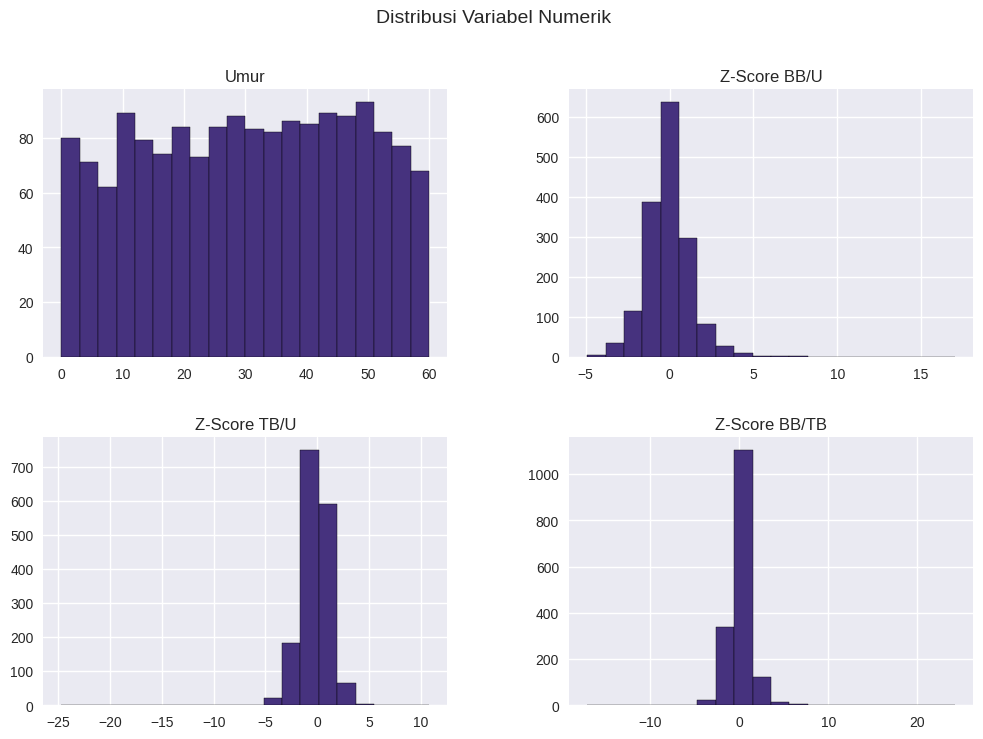

In [91]:
#DISTRIBUSI VARIABEL NUMERIK
numerik_cols = ['Umur', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB']
df[numerik_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik", fontsize=14)
plt.show()

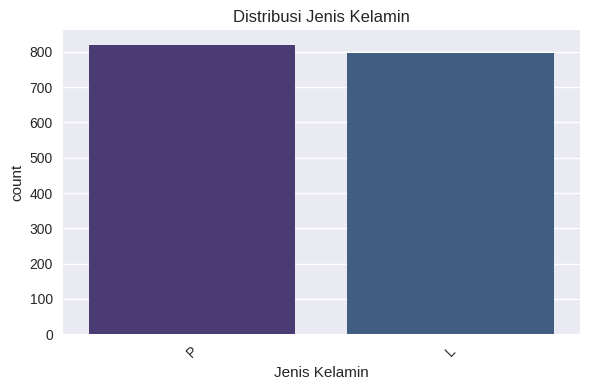

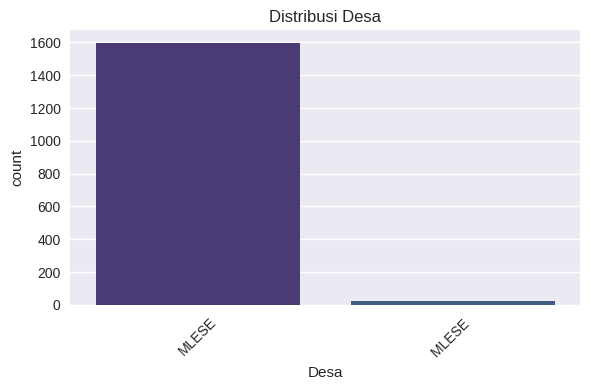

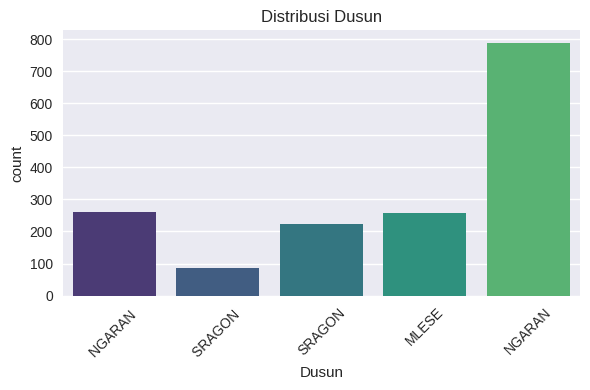

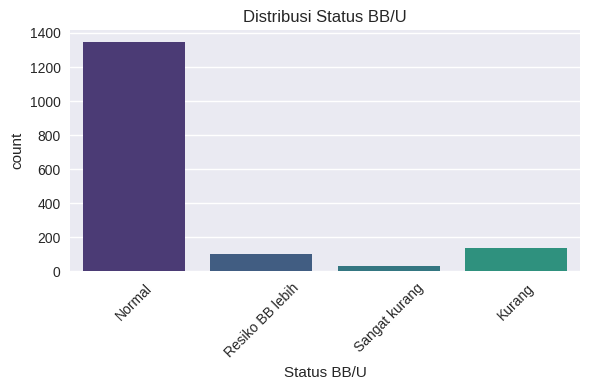

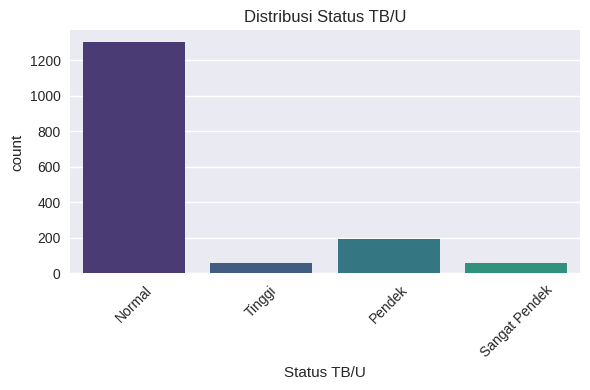

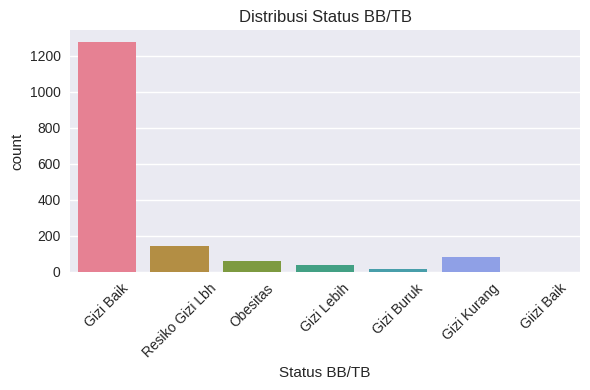

In [92]:
#DISTRIBUSI DATA KATEGORIKAL
kategori_cols = ['Jenis Kelamin', 'Desa', 'Dusun', 'Status BB/U', 'Status TB/U', 'Status BB/TB']
for col in kategori_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=df, x=col, hue=col, legend=False)
        plt.title(f"Distribusi {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

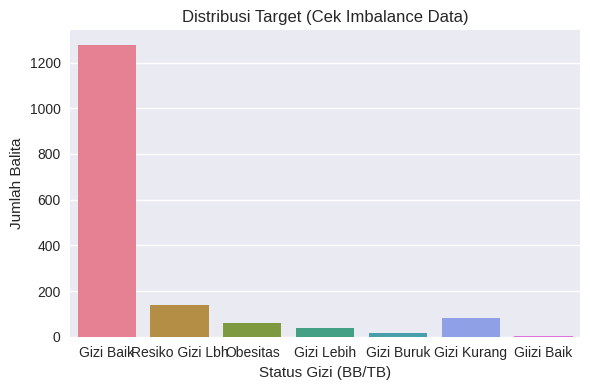

🔍 Distribusi Kelas Target:
Status BB/TB
Gizi Baik          78.97%
Resiko Gizi Lbh     8.72%
Gizi Kurang         5.07%
Obesitas            3.71%
Gizi Lebih          2.35%
Gizi Buruk          1.11%
Giizi Baik          0.06%
Name: proportion, dtype: object


In [93]:
#DISTRIBUSI TARGET VARIABEL (IMBALANCE CEK)
target_col = 'Status BB/TB'  # ubah jika target kamu berbeda
if target_col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=target_col, hue=target_col, legend=False)
    plt.title("Distribusi Target (Cek Imbalance Data)")
    plt.xlabel("Status Gizi (BB/TB)")
    plt.ylabel("Jumlah Balita")
    plt.tight_layout()
    plt.show()

    print("🔍 Distribusi Kelas Target:")
    print(df[target_col].value_counts(normalize=True).apply(lambda x: f"{x*100:.2f}%"))

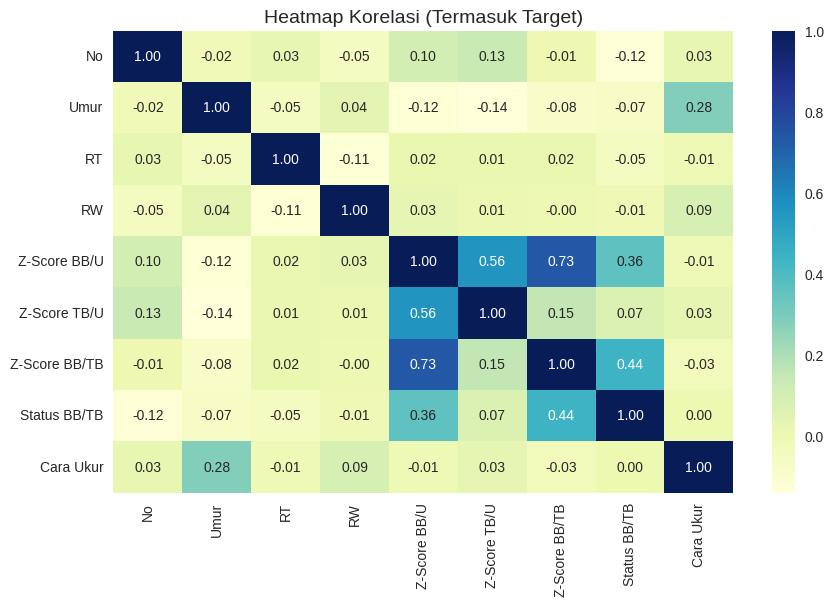

✅ EDA selesai. Siap lanjut ke proses mapping RT/RW → Posyandu.


In [94]:
# =============================================================================
# Korelasi Antar Fitur Numerik dan Target
# =============================================================================

target_col = 'Status BB/TB'  # sesuaikan dengan target utama kamu

if target_col in df.columns:
    df_corr = df.copy()

    # Ubah target menjadi kode numerik agar bisa dihitung korelasinya
    df_corr[target_col] = df_corr[target_col].astype('category').cat.codes

    # Pilih hanya kolom numerik
    numeric_only = df_corr.select_dtypes(include=['number'])

    # Hitung korelasi
    corr_matrix = numeric_only.corr()

    # Visualisasi heatmap korelasi
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt=".2f")
    plt.title("Heatmap Korelasi (Termasuk Target)", fontsize=14)
    plt.show()

print("✅ EDA selesai. Siap lanjut ke proses mapping RT/RW → Posyandu.")


# **4. PRE-PROCESSING DATA**

In [95]:
df_processed = df.copy()

- penanganan missing value

In [96]:
# Karena hanya sedikit yang kosong, isi dengan modus (nilai yang paling sering muncul)
if df_processed['RT'].isnull().sum() > 0:
    df_processed['RT'] = df_processed['RT'].fillna(df_processed['RT'].mode()[0])
if df_processed['RW'].isnull().sum() > 0:
    df_processed['RW'] = df_processed['RW'].fillna(df_processed['RW'].mode()[0])

In [97]:
# Pastikan format RT dan RW rapi (dua digit)
df_processed['RT'] = pd.to_numeric(df_processed['RT'], errors='coerce').fillna(0).astype(int).astype(str).str.zfill(2)
df_processed['RW'] = pd.to_numeric(df_processed['RW'], errors='coerce').fillna(0).astype(int).astype(str).str.zfill(2)

In [98]:
# Gunakan median karena data z-score bisa memiliki outlier
zscore_cols = ['Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB']
for col in zscore_cols:
    if col in df_processed.columns:
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce').fillna(df_processed[col].median())

In [99]:
# Gunakan modus untuk mempertahankan distribusi kelas yang paling sering muncul
if 'Status TB/U' in df_processed.columns:
    df_processed['Status TB/U'] = df_processed['Status TB/U'].fillna(df_processed['Status TB/U'].mode()[0])

In [100]:
missing_check = df_processed.isnull().sum()
missing_check = missing_check[missing_check > 0]

if missing_check.empty:
    print("\n✅ Semua missing value berhasil diisi.")
else:
    print("\n⚠️ Masih ada missing value pada kolom berikut:")
    print(missing_check)


✅ Semua missing value berhasil diisi.


In [101]:
# --- 2.5. Hasil akhir setelah penanganan missing value ---
print("\nJumlah missing value per kolom (setelah diisi):")
print(df_processed.isnull().sum())
print("\nContoh data setelah proses ini:")
print(df[['RT', 'RW', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB', 'Status TB/U']].head())


Jumlah missing value per kolom (setelah diisi):
No                        0
Nama Anak                 0
Tanggal Lahir             0
Umur                      0
Jenis Kelamin             0
Berat Badan Lahir (Kg)    0
Nama Ibu                  0
Desa                      0
Dusun                     0
Alamat                    0
RT                        0
RW                        0
Tanggal Pengukuran        0
BB                        0
TB                        0
Z-Score BB/U              0
Z-Score TB/U              0
Z-Score BB/TB             0
Status BB/U               0
Status TB/U               0
Status BB/TB              0
Cara Ukur                 0
dtype: int64

Contoh data setelah proses ini:
    RT   RW  Z-Score BB/U  Z-Score TB/U  Z-Score BB/TB Status TB/U
0  1.0  1.0           0.5          -0.2            0.8      Normal
1  1.0  1.0          -0.8           0.5           -0.6      Normal
2  1.0  1.0          -1.2          -1.0           -0.5      Normal
3  1.0  1.0          

In [102]:
# Ganti koma menjadi titik dan ubah ke float
for col in numerik_cols:
    df_processed[col] = df_processed[col].astype(str).str.replace(',', '.').astype(float)

print("✅ Semua kolom numerik sudah dikonversi ke tipe float.")
print(df_processed[numerik_cols].dtypes)

✅ Semua kolom numerik sudah dikonversi ke tipe float.
Umur             float64
BB               float64
TB               float64
Z-Score BB/U     float64
Z-Score TB/U     float64
Z-Score BB/TB    float64
dtype: object


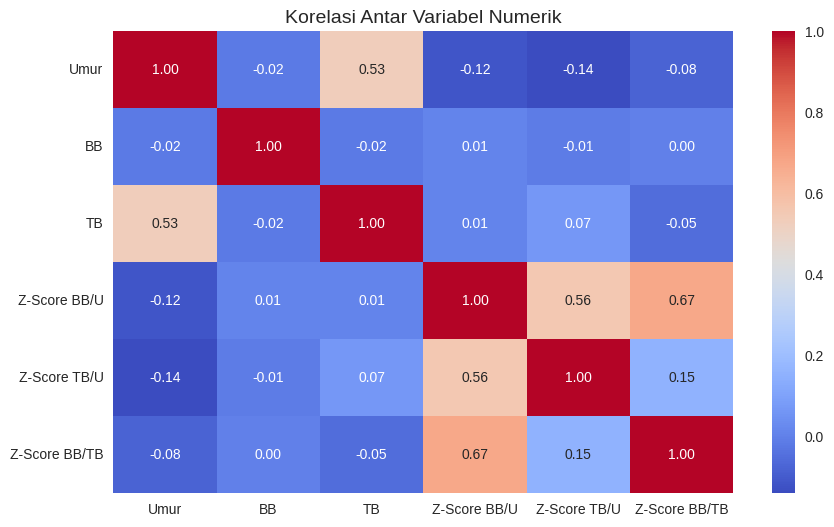

In [103]:
#KORELASI ANTAR VARIABEL NUMERIK
plt.figure(figsize=(10, 6))
corr_matrix = df_processed[numerik_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Variabel Numerik", fontsize=14)
plt.show()

In [104]:
# Bersihkan kolom 'Desa' dari spasi dan variasi penulisan
df_processed['Desa'] = df_processed['Desa'].str.strip().str.upper()

# Tampilkan nilai unik setelah pembersihan
print("📋 Nilai unik kolom 'Desa' setelah pembersihan:")
print(df_processed['Desa'].unique())

📋 Nilai unik kolom 'Desa' setelah pembersihan:
['MLESE']


In [105]:
#Perbaikan pada kolom Dusun
# Bersihkan teks kolom 'Dusun'
df_processed['Dusun'] = df_processed['Dusun'].str.strip().str.upper()

# Normalisasi ejaan yang salah
df_processed['Dusun'] = df_processed['Dusun'].replace({
    'SRAGON': 'SRAGON',   # Pastikan ejaan baku
    'SRAGON ': 'SRAGON',  # Hilangkan spasi
    'SRAGONN': 'SRAGON',  # Kalau ada typo
    'NGARAN ': 'NGARAN',  # Hilangkan spasi
    'MLESE ': 'MLESE'     # Pastikan konsisten
})

# Tampilkan nilai unik setelah diperbaiki
print("📋 Nilai unik kolom 'Dusun' setelah perbaikan:")
print(df_processed['Dusun'].unique())


📋 Nilai unik kolom 'Dusun' setelah perbaikan:
['NGARAN' 'SRAGON' 'MLESE']


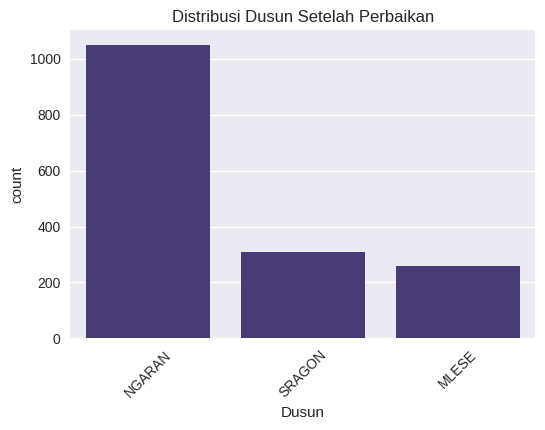

In [106]:
plt.figure(figsize=(6,4))
sns.countplot(x='Dusun', data=df_processed)
plt.title('Distribusi Dusun Setelah Perbaikan')
plt.xticks(rotation=45)
plt.show()

3.1 mapping rt/rw ke nama posyandu

In [107]:
# 2️⃣ Cek apakah kolom RT dan RW ada setelah normalisasi
if 'RT' not in df.columns or 'RW' not in df.columns:
    raise KeyError("Kolom 'RT' dan/atau 'RW' tidak ditemukan di dataset. Cek kembali nama kolom di file Excel!")

In [108]:
# 3️⃣ Definisikan fungsi mapping posyandu
def map_posyandu(rt, rw):
    # Pastikan RT dan RW jadi string dua digit (contoh: 1 → '01')
    rt = str(rt).zfill(2)
    rw = str(rw).zfill(2)

    # Larasati 1: RT 01–03 / RW 06
    if rw == '06' and rt in ['01', '02', '03']:
        return 'Larasati 1'

    # Larasati 2: RT 01–02 / RW 04–05
    elif rw in ['04', '05'] and rt in ['01', '02']:
        return 'Larasati 2'

    # Larasati 3: RT 01–03 / RW 02–03
    elif rw in ['02', '03'] and rt in ['01', '02', '03']:
        return 'Larasati 3'

    # Larasati 4: RT 01–03 / RW 01
    elif rw == '01' and rt in ['01', '02', '03']:
        return 'Larasati 4'

    # Larasati 5: RT 01–03 / RW 07
    elif rw == '07' and rt in ['01', '02', '03']:
        return 'Larasati 5'

    # Selain kombinasi di atas
    else:
        return 'Lainnya'

#4️⃣ Terapkan fungsi mapping ke DataFrame
df_processed['Posyandu'] = df_processed.apply(lambda row: map_posyandu(row['RT'], row['RW']), axis=1)

In [109]:
# 5️⃣ Cek hasil mapping
print("✅ Kolom 'Posyandu' berhasil dibuat berdasarkan kombinasi RT dan RW .")
print(df_processed[['RT', 'RW', 'Posyandu']].head(10))

✅ Kolom 'Posyandu' berhasil dibuat berdasarkan kombinasi RT dan RW .
   RT  RW    Posyandu
0  01  01  Larasati 4
1  01  01  Larasati 4
2  01  01  Larasati 4
3  01  01  Larasati 4
4  01  02  Larasati 3
5  01  02  Larasati 3
6  02  01  Larasati 4
7  02  01  Larasati 4
8  02  01  Larasati 4
9  02  01  Larasati 4


In [110]:
# =============================================================================
# 6. ENCODING KOLOM 'POSYANDU' (ONE-HOT ENCODING TANPA DROP)
# =============================================================================

# Inisialisasi encoder tanpa drop
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Transform kolom Posyandu
posyandu_encoded = encoder.fit_transform(df_processed[['Posyandu']])

# Ambil nama kolom hasil encoding
encoded_cols = encoder.get_feature_names_out(['Posyandu'])

# Buat DataFrame hasil encoding
df_posyandu_encoded = pd.DataFrame(posyandu_encoded, columns=encoded_cols, index=df_processed.index)

# Gabungkan hasil encoding dengan df_processed
df_processed = pd.concat([df_processed, df_posyandu_encoded], axis=1)

# Hapus kolom aslinya karena sudah digantikan versi numerik
df_processed.drop('Posyandu', axis=1, inplace=True)

print("✅ Kolom 'Posyandu' berhasil di-encode tanpa menghapus kategori apa pun.")
print(df_processed.filter(like='Posyandu').head(10))


✅ Kolom 'Posyandu' berhasil di-encode tanpa menghapus kategori apa pun.
   Posyandu_Larasati 1  Posyandu_Larasati 2  Posyandu_Larasati 3  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  1.0   
5                  0.0                  0.0                  1.0   
6                  0.0                  0.0                  0.0   
7                  0.0                  0.0                  0.0   
8                  0.0                  0.0                  0.0   
9                  0.0                  0.0                  0.0   

   Posyandu_Larasati 4  Posyandu_Larasati 5  
0                  1.0                  0.0  
1                  1.0                  0.0  
2                  1.0                  0

3.2 One-Hot Encoding & Seleksi Fitur

In [111]:
print(df_processed.columns.tolist())

['No', 'Nama Anak', 'Tanggal Lahir', 'Umur', 'Jenis Kelamin', 'Berat Badan Lahir (Kg)', 'Nama Ibu', 'Desa', 'Dusun', 'Alamat', 'RT', 'RW', 'Tanggal Pengukuran', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB', 'Status BB/U', 'Status TB/U', 'Status BB/TB', 'Cara Ukur', 'Posyandu_Larasati 1', 'Posyandu_Larasati 2', 'Posyandu_Larasati 3', 'Posyandu_Larasati 4', 'Posyandu_Larasati 5']


In [112]:
# Encoding Kolom 'Jenis Kelamin' menggunakan Mapping Encoding
if 'Jenis Kelamin' in df_processed.columns:
    df_processed['Jenis Kelamin'] = df_processed['Jenis Kelamin'].map({'L': 1, 'P': 0})
    print("✅ Kolom 'Jenis Kelamin' berhasil di-encode (L=1, P=0)")
else:
    print("⚠️ Kolom 'Jenis Kelamin' tidak ditemukan dalam dataset.")

# Cek hasil
print(df_processed[['Jenis Kelamin']].head())

✅ Kolom 'Jenis Kelamin' berhasil di-encode (L=1, P=0)
   Jenis Kelamin
0              0
1              0
2              1
3              1
4              1


In [113]:
# Encoding kolom "Dusun" dengan menggunakan One Hot Encoding
if 'Dusun' in df_processed.columns:
    # Bersihkan spasi berlebih
    df_processed['Dusun'] = df_processed['Dusun'].astype(str).str.strip()

    # Cek nilai unik
    print("📋 Nilai unik pada kolom 'Dusun' setelah dibersihkan:")
    print(df_processed['Dusun'].unique())

    # Terapkan One-Hot Encoding
    df_processed = pd.get_dummies(df_processed, columns=['Dusun'], prefix='Dusun')

    print("\n✅ One-Hot Encoding untuk kolom 'Dusun' berhasil dilakukan.")
    print("🔍 Kolom baru hasil encoding:")
    print([col for col in df_processed.columns if 'Dusun_' in col])

    # Contoh hasil encoding
    print("\n🔍 Contoh data setelah encoding:")
    print(df_processed.filter(like='Dusun_').head())

else:
    print("⚠️ Kolom 'Dusun' tidak ditemukan di dataframe.")

📋 Nilai unik pada kolom 'Dusun' setelah dibersihkan:
['NGARAN' 'SRAGON' 'MLESE']

✅ One-Hot Encoding untuk kolom 'Dusun' berhasil dilakukan.
🔍 Kolom baru hasil encoding:
['Dusun_MLESE', 'Dusun_NGARAN', 'Dusun_SRAGON']

🔍 Contoh data setelah encoding:
   Dusun_MLESE  Dusun_NGARAN  Dusun_SRAGON
0        False          True         False
1        False          True         False
2        False          True         False
3        False          True         False
4        False          True         False


In [114]:
# Pastikan kolom ada
if 'Status BB/U' in df_processed.columns:
    print("📋 Nilai unik pada kolom 'Status BB/U':")
    print(df_processed['Status BB/U'].unique())

    print("\n📊 Jumlah masing-masing kategori:")
    print(df_processed['Status BB/U'].value_counts())
else:
    print("⚠️ Kolom 'Status BB/U' tidak ditemukan di dataset.")

📋 Nilai unik pada kolom 'Status BB/U':
['Normal' 'Resiko BB lebih' 'Sangat kurang' 'Kurang']

📊 Jumlah masing-masing kategori:
Status BB/U
Normal             1348
Kurang              138
Resiko BB lebih     100
Sangat kurang        31
Name: count, dtype: int64


In [115]:
# Encoding kolom 'Status BB/U' menggunakan Ordinal Encoding
if 'Status BB/U' in df_processed.columns:
    # 1️⃣ Bersihkan teks dari spasi dan variasi penulisan
    df_processed['Status BB/U'] = df_processed['Status BB/U'].str.strip().str.title()

    # 2️⃣ Normalisasi istilah yang tidak konsisten
    df_processed['Status BB/U'] = df_processed['Status BB/U'].replace({
        'Resiko Bb Lebih': 'Risiko Gizi Lebih',
        'Risiko Bb Lebih': 'Risiko Gizi Lebih',
        'Resiko Gizi Lbh': 'Risiko Gizi Lebih',
    })

    # 3️⃣ Mapping ke ordinal value (sesuai urutan status gizi)
    mapping_status_bbu = {
        'Sangat Kurang': 0,
        'Kurang': 1,
        'Normal': 2,
        'Risiko Gizi Lebih': 3
    }

    # 4️⃣ Terapkan mapping
    df_processed['Status BB/U (Encoded)'] = df_processed['Status BB/U'].map(mapping_status_bbu)

    # 5️⃣ Tampilkan hasil
    print("✅ Encoding kolom 'Status BB/U' berhasil dilakukan dengan Ordinal Encoding.\n")
    print(df_processed[['Status BB/U', 'Status BB/U (Encoded)']].head())

    # 6️⃣ Cek apakah ada nilai yang belum ter-encode
    if df_processed['Status BB/U (Encoded)'].isna().any():
        print("\n⚠️ Ada nilai yang belum ter-encode, berikut nilainya:")
        print(df_processed.loc[df_processed['Status BB/U (Encoded)'].isna(), 'Status BB/U'].unique())

else:
    print("⚠️ Kolom 'Status BB/U' tidak ditemukan dalam dataset.")

✅ Encoding kolom 'Status BB/U' berhasil dilakukan dengan Ordinal Encoding.

  Status BB/U  Status BB/U (Encoded)
0      Normal                      2
1      Normal                      2
2      Normal                      2
3      Normal                      2
4      Normal                      2


In [116]:
# ============================================================
# 🔹 1️⃣ Cek nilai unik dan jumlah kategori pada kolom 'Status TB/U'
# ============================================================
if 'Status TB/U' in df_processed.columns:
    print("📋 Nilai unik pada kolom 'Status TB/U':")
    print(df_processed['Status TB/U'].unique())

    print("\n📊 Jumlah masing-masing kategori:")
    print(df_processed['Status TB/U'].value_counts())

📋 Nilai unik pada kolom 'Status TB/U':
['Normal' 'Tinggi' 'Pendek' 'Sangat Pendek']

📊 Jumlah masing-masing kategori:
Status TB/U
Normal           1304
Pendek            192
Sangat Pendek      61
Tinggi             60
Name: count, dtype: int64


In [117]:
# ============================================================
# 🔹 Encoding kolom 'Status TB/U' menggunakan Ordinal Encoding
# ============================================================

if 'Status TB/U' in df_processed.columns:
    # 1️⃣ Bersihkan teks dari spasi dan variasi penulisan
    df_processed['Status TB/U'] = df_processed['Status TB/U'].astype(str).str.strip().str.title()

    # 2️⃣ Normalisasi istilah (jaga konsistensi)
    df_processed['Status TB/U'] = df_processed['Status TB/U'].replace({
        'Sangat Pendek': 'Sangat Pendek',
        'Pendek': 'Pendek',
        'Normal': 'Normal',
        'Tinggi': 'Tinggi'
    })

    # 3️⃣ Mapping urutan ordinal status gizi
    mapping_status_tbu = {
        'Sangat Pendek': 0,
        'Pendek': 1,
        'Normal': 2,
        'Tinggi': 3
    }

    # 4️⃣ Terapkan mapping
    df_processed['Status TB/U (Encoded)'] = df_processed['Status TB/U'].map(mapping_status_tbu)

    # 5️⃣ Tampilkan hasil
    print("\n✅ Encoding kolom 'Status TB/U' berhasil dilakukan dengan Ordinal Encoding.")
    print(df_processed[['Status TB/U', 'Status TB/U (Encoded)']].head())

    # 6️⃣ Cek apakah ada nilai yang belum ter-encode
    if df_processed['Status TB/U (Encoded)'].isna().any():
        print("\n⚠️ Ada nilai yang belum ter-encode, berikut nilainya:")
        print(df_processed.loc[df_processed['Status TB/U (Encoded)'].isna(), 'Status TB/U'].unique())

else:
    print("⚠️ Kolom 'Status TB/U' tidak ditemukan dalam dataset.")



✅ Encoding kolom 'Status TB/U' berhasil dilakukan dengan Ordinal Encoding.
  Status TB/U  Status TB/U (Encoded)
0      Normal                      2
1      Normal                      2
2      Normal                      2
3      Normal                      2
4      Normal                      2


In [118]:
# ✅ 1️⃣ Pastikan kolom 'Status BB/TB' ada
if 'Status BB/TB' in df_processed.columns:
    # Tampilkan nama kolom target
    print("🎯 Nama target kolom:", 'Status BB/TB')

    # ✅ 2️⃣ Lihat nilai unik dan jumlah tiap kategori
    print("\n📋 Nilai unik pada kolom 'Status BB/TB':")
    print(df_processed['Status BB/TB'].unique())
    print("\n📊 Jumlah masing-masing kategori:")
    print(df_processed['Status BB/TB'].value_counts())

🎯 Nama target kolom: Status BB/TB

📋 Nilai unik pada kolom 'Status BB/TB':
['Gizi Baik' 'Resiko Gizi Lbh' 'Obesitas' 'Gizi Lebih' 'Gizi Buruk'
 'Gizi Kurang' 'Giizi Baik']

📊 Jumlah masing-masing kategori:
Status BB/TB
Gizi Baik          1277
Resiko Gizi Lbh     141
Gizi Kurang          82
Obesitas             60
Gizi Lebih           38
Gizi Buruk           18
Giizi Baik            1
Name: count, dtype: int64


In [119]:
# ✅ 1️⃣ Pastikan kolom 'Status BB/TB' ada
if 'Status BB/TB' in df_processed.columns:
    # ✅ 2️⃣ Bersihkan teks dari spasi & seragamkan huruf
    df_processed['Status BB/TB'] = df_processed['Status BB/TB'].astype(str).str.strip().str.title()

    # ✅ 3️⃣ Normalisasi penulisan kategori jika ada yang salah tulis
    df_processed['Status BB/TB'] = df_processed['Status BB/TB'].replace({
        'Giizi Baik': 'Gizi Baik',              # salah ketik → benar
        'Resiko Gizi Lbh': 'Risiko Gizi Lebih', # singkatan → lengkap
        'Resiko Gizi Lebih': 'Risiko Gizi Lebih',
        'Gizi Buruk': 'Gizi Buruk',
        'Gizi Kurang': 'Gizi Kurang',
        'Gizi Baik': 'Gizi Baik',
        'Risiko Gizi Lebih': 'Risiko Gizi Lebih',
        'Gizi Lebih': 'Gizi Lebih',
        'Obesitas': 'Obesitas'
    })

    # ✅ 4️⃣ Buat mapping Ordinal berdasarkan tingkat gizi (dari terendah → tertinggi)
    mapping_status_bbtb = {
        'Gizi Buruk': 0,
        'Gizi Kurang': 1,
        'Gizi Baik': 2,
        'Risiko Gizi Lebih': 3,
        'Gizi Lebih': 4,
        'Obesitas': 5
    }

    # ✅ 5️⃣ Terapkan mapping
    df_processed['Status BB/TB (Encoded)'] = df_processed['Status BB/TB'].map(mapping_status_bbtb)

    # ✅ 6️⃣ Tampilkan hasil encoding
    print("\n✅ Encoding kolom 'Status BB/TB' berhasil dilakukan dengan Ordinal Encoding.\n")
    print(df_processed[['Status BB/TB', 'Status BB/TB (Encoded)']].head())

    # ✅ 7️⃣ Cek jika ada nilai yang belum ter-encode
    if df_processed['Status BB/TB (Encoded)'].isna().any():
        print("\n⚠️ Ada nilai yang belum ter-encode:")
        print(df_processed.loc[df_processed['Status BB/TB (Encoded)'].isna(), 'Status BB/TB'].unique())

else:
    print("⚠️ Kolom 'Status BB/TB' tidak ditemukan dalam dataset.")



✅ Encoding kolom 'Status BB/TB' berhasil dilakukan dengan Ordinal Encoding.

        Status BB/TB  Status BB/TB (Encoded)
0          Gizi Baik                       2
1          Gizi Baik                       2
2          Gizi Baik                       2
3  Risiko Gizi Lebih                       3
4           Obesitas                       5


In [120]:
print("📋 Daftar kolom di dataset kamu:")
print(df_processed.columns.tolist())


📋 Daftar kolom di dataset kamu:
['No', 'Nama Anak', 'Tanggal Lahir', 'Umur', 'Jenis Kelamin', 'Berat Badan Lahir (Kg)', 'Nama Ibu', 'Desa', 'Alamat', 'RT', 'RW', 'Tanggal Pengukuran', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB', 'Status BB/U', 'Status TB/U', 'Status BB/TB', 'Cara Ukur', 'Posyandu_Larasati 1', 'Posyandu_Larasati 2', 'Posyandu_Larasati 3', 'Posyandu_Larasati 4', 'Posyandu_Larasati 5', 'Dusun_MLESE', 'Dusun_NGARAN', 'Dusun_SRAGON', 'Status BB/U (Encoded)', 'Status TB/U (Encoded)', 'Status BB/TB (Encoded)']


In [121]:
# =============================================================================
# CEK SEMUA KOLOM DALAM DATAFRAME df_processed
# =============================================================================

print("=== Daftar Kolom pada df_processed ===")
for i, col in enumerate(df_processed.columns, start=1):
    print(f"{i}. {col}")

print(f"\nTotal kolom: {len(df_processed.columns)}")


=== Daftar Kolom pada df_processed ===
1. No
2. Nama Anak
3. Tanggal Lahir
4. Umur
5. Jenis Kelamin
6. Berat Badan Lahir (Kg)
7. Nama Ibu
8. Desa
9. Alamat
10. RT
11. RW
12. Tanggal Pengukuran
13. BB
14. TB
15. Z-Score BB/U
16. Z-Score TB/U
17. Z-Score BB/TB
18. Status BB/U
19. Status TB/U
20. Status BB/TB
21. Cara Ukur
22. Posyandu_Larasati 1
23. Posyandu_Larasati 2
24. Posyandu_Larasati 3
25. Posyandu_Larasati 4
26. Posyandu_Larasati 5
27. Dusun_MLESE
28. Dusun_NGARAN
29. Dusun_SRAGON
30. Status BB/U (Encoded)
31. Status TB/U (Encoded)
32. Status BB/TB (Encoded)

Total kolom: 32


In [122]:
# Cek nama kolom dan contoh isi satu baris
print("=== Nama Kolom dan Contoh Isinya ===")
for col in df_processed.columns:
    print(f"{col} → {df_processed[col].iloc[0]}")


=== Nama Kolom dan Contoh Isinya ===
No → 1
Nama Anak → KANISA GENDHIS AMELIA
Tanggal Lahir → 10-01-2019
Umur → 20.0
Jenis Kelamin → 0
Berat Badan Lahir (Kg) → 2.8
Nama Ibu → ATIKA WINDI HASTINI
Desa → MLESE
Alamat → NGARAN
RT → 01
RW → 01
Tanggal Pengukuran → 23-09-2020
BB → 10.0
TB → 80.0
Z-Score BB/U → 0.5
Z-Score TB/U → -0.2
Z-Score BB/TB → 0.8
Status BB/U → Normal
Status TB/U → Normal
Status BB/TB → Gizi Baik
Cara Ukur → 1
Posyandu_Larasati 1 → 0.0
Posyandu_Larasati 2 → 0.0
Posyandu_Larasati 3 → 0.0
Posyandu_Larasati 4 → 1.0
Posyandu_Larasati 5 → 0.0
Dusun_MLESE → False
Dusun_NGARAN → True
Dusun_SRAGON → False
Status BB/U (Encoded) → 2
Status TB/U (Encoded) → 2
Status BB/TB (Encoded) → 2


In [123]:
# 1️⃣ Hitung jumlah kunjungan per anak
frekuensi_kunjungan = df_processed.groupby('Nama Anak').size().reset_index(name='Frekuensi Kunjungan')

# 2️⃣ Tampilkan hasil awal
print("📋 Contoh hasil perhitungan frekuensi kunjungan per anak:")
print(frekuensi_kunjungan.head())

📋 Contoh hasil perhitungan frekuensi kunjungan per anak:
                        Nama Anak  Frekuensi Kunjungan
0           ABIAN NEVAN A RIYANTO                    6
1              ABID AQILA ABRAHAM                    8
2               ABIDZAR DEWANTARA                   11
3        ABIDZAR GIBRANTARA RASKY                    1
4  ABIZAR GIBRANTARA RASKY ALFAHR                    6


In [124]:
print("\n📊 Statistik deskriptif frekuensi kunjungan:")
print(frekuensi_kunjungan['Frekuensi Kunjungan'].describe())


📊 Statistik deskriptif frekuensi kunjungan:
count    336.000000
mean       4.812500
std        2.653743
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       12.000000
Name: Frekuensi Kunjungan, dtype: float64


In [125]:
# Anak paling sering & paling jarang datang
print("\n👧 Anak paling sering datang ke posyandu:")
print(frekuensi_kunjungan.sort_values('Frekuensi Kunjungan', ascending=False).head(5))

print("\n👶 Anak paling jarang datang ke posyandu:")
print(frekuensi_kunjungan.sort_values('Frekuensi Kunjungan', ascending=True).head(5))


👧 Anak paling sering datang ke posyandu:
                 Nama Anak  Frekuensi Kunjungan
262  NIZAM AHIDQI ARSALAAN                   12
318     UWAIS ZAIDAN FALAH                   11
284      RASYA ANADYA AZKA                   11
281    RAGIL MERIANA PUTRI                   11
149       GEMILANG ADITAMA                   11

👶 Anak paling jarang datang ke posyandu:
                 Nama Anak  Frekuensi Kunjungan
19     AISYAH MARWAH INARA                    1
28     ALIFA PUTRI ARINIKA                    1
30   ALIKA PUTRI KINANTHI                     1
308          SHALIH AQLANI                    1
319     VANIA AQILA PUTRI                     1


# **5. FEATURE ENGINEERING**

In [126]:
# Menampilkan semua kolom pada DataFrame
pd.set_option('display.max_columns', None)

# Tampilkan 10 baris pertama (bisa diubah jumlahnya)
print(df_processed.head(10))


   No               Nama Anak Tanggal Lahir  Umur  Jenis Kelamin  \
0   1   KANISA GENDHIS AMELIA    10-01-2019  20.0              0   
1   2  GHANIA FRADELLA LEENA     30-06-2019  14.0              0   
2   3  RAYYAN ALFARIZI PUTRA     19-07-2018  26.0              1   
3   4          FAUZAN ADHIMA     24-11-2017  33.0              1   
4   5     REXZA ACELIN ATHA A    19-06-2017  39.0              1   
5   6   NAJWA ALMEERA MADHURI    23-02-2017  43.0              1   
6   7           AZKA NANDANA     04-09-2016  48.0              1   
7   8   FIONA YASMINA SAUQIYA    01-05-2016  52.0              0   
8   9    AZKA FATHIR YULIANTO    04-03-2016  54.0              1   
9  10       ALFAREZEL NENDR P    13-08-2017  37.0              0   

  Berat Badan Lahir (Kg)             Nama Ibu   Desa   Alamat  RT  RW  \
0                    2.8  ATIKA WINDI HASTINI  MLESE   NGARAN  01  01   
1                      3  RENANI PUJI ASTUTI   MLESE   NGARAN  01  01   
2                    2.7        

In [127]:
# Tentukan kolom target
target_col = 'Status BB/TB (Encoded)'

# Pilih kolom numerik utama
num_cols = ['Umur', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB']

# Tambahkan fitur hasil encoding dan one-hot encoding
encoded_features = [
    'Jenis Kelamin',
    'Status BB/U (Encoded)',
    'Status TB/U (Encoded)',
    'Dusun_MLESE',
    'Dusun_NGARAN',
    'Dusun_SRAGON',
    'Posyandu_Larasati 1',
    'Posyandu_Larasati 2',
    'Posyandu_Larasati 3',
    'Posyandu_Larasati 4',
    'Posyandu_Larasati 5'
]

# Gabungkan semua kandidat fitur
feature_candidates = num_cols + encoded_features

In [128]:
# Hitung korelasi terhadap target
corr_matrix = df_processed[feature_candidates + [target_col]].corr()[target_col].sort_values(ascending=False)

print("=== Korelasi Fitur terhadap Target (Status BB/TB) ===")
print(corr_matrix)

=== Korelasi Fitur terhadap Target (Status BB/TB) ===
Status BB/TB (Encoded)    1.000000
Z-Score BB/TB             0.699678
Z-Score BB/U              0.611894
Status BB/U (Encoded)     0.543711
Status TB/U (Encoded)     0.137268
Z-Score TB/U              0.128838
BB                        0.081219
Posyandu_Larasati 4       0.065267
Posyandu_Larasati 2       0.058698
Dusun_MLESE               0.058698
Posyandu_Larasati 1       0.005533
Dusun_NGARAN             -0.005390
Jenis Kelamin            -0.017071
Dusun_SRAGON             -0.048130
Posyandu_Larasati 3      -0.051551
Posyandu_Larasati 5      -0.065821
Umur                     -0.078965
TB                       -0.092403
Name: Status BB/TB (Encoded), dtype: float64


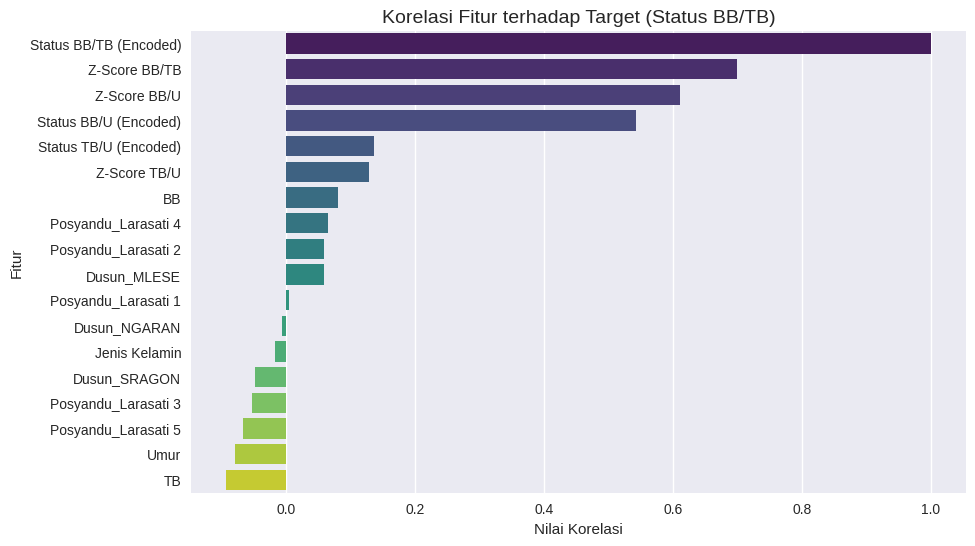

In [129]:
# Visualisasi korelasi
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_matrix.values, y=corr_matrix.index, palette='viridis')
plt.title("Korelasi Fitur terhadap Target (Status BB/TB)", fontsize=14)
plt.xlabel("Nilai Korelasi")
plt.ylabel("Fitur")
plt.show()

In [130]:
# Pilih fitur dengan korelasi cukup signifikan
selected_features = corr_matrix[abs(corr_matrix) > 0.1].index.tolist()
selected_features.remove(target_col)

print("\n✅ Fitur yang dipilih berdasarkan korelasi:")
print(selected_features)


✅ Fitur yang dipilih berdasarkan korelasi:
['Z-Score BB/TB', 'Z-Score BB/U', 'Status BB/U (Encoded)', 'Status TB/U (Encoded)', 'Z-Score TB/U']


#**6. Feature Selection**

In [131]:
# Tentukan kolom target
target_col = 'Status BB/TB (Encoded)'

# Fitur yang dipilih berdasarkan korelasi (dan relevan untuk model)
selected_features = [
    'Z-Score BB/TB',
    'Z-Score BB/U',
    'Status BB/U (Encoded)',
    'Status TB/U (Encoded)',
    'Z-Score TB/U'
]

# Pisahkan fitur (X) dan target (y)
X = df_processed[selected_features]
y = df_processed[target_col]

In [132]:
print("✅ Dimensi data sebelum split:")
print("Fitur (X):", X.shape)
print("Target (y):", y.shape)

✅ Dimensi data sebelum split:
Fitur (X): (1617, 5)
Target (y): (1617,)


# **7. PEMBAGIAN DATA TRAIN DAN TEST**

In [133]:
# Gunakan fitur dan target dari hasil feature selection sebelumnya
X = df_processed[selected_features]   # Fitur input
y = df_processed[target_col]          # Target output (Status BB/TB (Encoded))

# Bagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% untuk data uji
    random_state=42,      # Supaya hasil pembagian selalu sama setiap dijalankan
    stratify=y            # Menjaga proporsi kelas target tetap seimbang
)

In [134]:
# Tampilkan hasil pembagian data
print("✅ Data berhasil dibagi menjadi train dan test")
print("Jumlah data latih (X_train):", X_train.shape)
print("Jumlah data uji (X_test):", X_test.shape)
print("Jumlah target latih (y_train):", y_train.shape)
print("Jumlah target uji (y_test):", y_test.shape)

✅ Data berhasil dibagi menjadi train dan test
Jumlah data latih (X_train): (1293, 5)
Jumlah data uji (X_test): (324, 5)
Jumlah target latih (y_train): (1293,)
Jumlah target uji (y_test): (324,)


# **8. MENGATASI KETIDAKSEIMBANGAN DATA DENGAN ADASYN**

In [135]:
# Lihat distribusi awal kelas pada data latih
print("Distribusi awal data latih:", Counter(y_train))

Distribusi awal data latih: Counter({2: 1022, 3: 113, 1: 66, 5: 48, 4: 30, 0: 14})


In [136]:
# Inisialisasi ADASYN
adasyn = ADASYN(random_state=42)

# Terapkan oversampling hanya pada data latih
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

In [137]:
# Distribusi setelah oversampling
print("Distribusi setelah ADASYN:", Counter(y_train_res))

# Lihat bentuk data baru
print("Bentuk data latih sebelum ADASYN:", X_train.shape)
print("Bentuk data latih setelah ADASYN:", X_train_res.shape)

Distribusi setelah ADASYN: Counter({3: 1027, 2: 1022, 0: 1022, 1: 1020, 4: 1020, 5: 1014})
Bentuk data latih sebelum ADASYN: (1293, 5)
Bentuk data latih setelah ADASYN: (6125, 5)


#**9. PELATIHAN MODEL RANDOM FOREST**

- PELATIHAN MODEL MENGGUNAKAN ADASYN

In [138]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,        # jumlah pohon
    max_depth=None,          # biarkan algoritma menentukan otomatis
    random_state=42,
    class_weight=None        # karena sudah di-balance oleh ADASYN
)

# Latih model menggunakan data hasil ADASYN
rf_model.fit(X_train_res, y_train_res)

# Prediksi pada data uji
y_pred = rf_model.predict(X_test)

In [139]:
# Evaluasi performa model
print("=== HASIL EVALUASI MODEL RANDOM FOREST ===")
print("Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

=== HASIL EVALUASI MODEL RANDOM FOREST ===
Akurasi: 81.79 %

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.33      0.75      0.46         4
           1       0.41      0.69      0.51        16
           2       0.96      0.84      0.90       256
           3       0.57      0.71      0.63        28
           4       0.36      0.50      0.42         8
           5       0.69      0.92      0.79        12

    accuracy                           0.82       324
   macro avg       0.55      0.74      0.62       324
weighted avg       0.86      0.82      0.83       324



<Figure size 800x600 with 0 Axes>

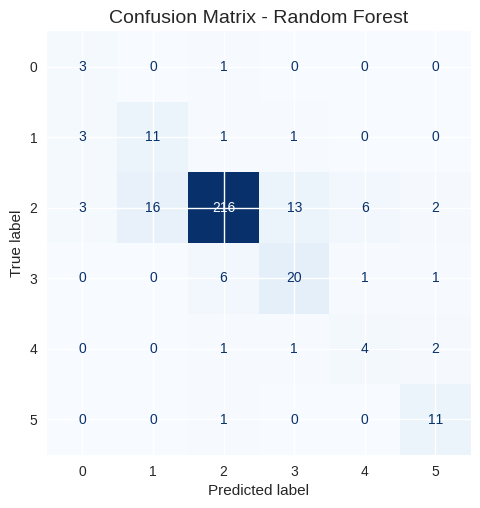

In [140]:
# Confusion matrix
plt.figure(figsize=(8,6))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues', colorbar=False)
plt.title("Confusion Matrix - Random Forest", fontsize=14)
plt.show()

- PELATIHAN MODEL MENGGUNAKAN GridSearchCV

In [141]:
# Tentukan kombinasi parameter yang ingin dicoba
param_grid = {
    'n_estimators': [100, 200, 300],      # jumlah pohon dalam hutan
    'max_depth': [None, 10, 20],          # kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],      # minimal data untuk split
    'min_samples_leaf': [1, 2, 4]         # minimal data per daun
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='f1_macro',    # fokus ke keseimbangan antar kelas
    n_jobs=-1,
    verbose=2
)

# Jalankan grid search pada data hasil oversampling (ADASYN)
grid_search.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro', verbose=2)

In [142]:
# Tampilkan parameter terbaik
print("\n✅ Best Parameters:")
print(grid_search.best_params_)


✅ Best Parameters:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [143]:
# Gunakan model terbaik
best_rf = grid_search.best_estimator_

In [144]:
#Evaluasi Model Terbaik
y_pred_best = best_rf.predict(X_test)

print("=== HASIL EVALUASI MODEL RANDOM FOREST (Setelah Tuning) ===")
print("Akurasi:", round(accuracy_score(y_test, y_pred_best) * 100, 2), "%")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_best))

=== HASIL EVALUASI MODEL RANDOM FOREST (Setelah Tuning) ===
Akurasi: 81.17 %

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.33      0.75      0.46         4
           1       0.39      0.69      0.50        16
           2       0.95      0.84      0.89       256
           3       0.56      0.68      0.61        28
           4       0.36      0.50      0.42         8
           5       0.69      0.92      0.79        12

    accuracy                           0.81       324
   macro avg       0.55      0.73      0.61       324
weighted avg       0.86      0.81      0.83       324



- PELATIHAN MODEL MENGGUNAKAN BALANCED RANDOM FOREST

In [145]:
#KLASIFIKASI DENGAN BALANCED RANDOM FOREST
# Gunakan fitur dan target hasil seleksi sebelumnya
X = df_processed[selected_features]
y = df_processed[target_col]

In [146]:
# Split data (train-test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Distribusi Data Training (Sebelum Balance):", Counter(y_train))
print("✅ Distribusi Data Testing:", Counter(y_test))

✅ Distribusi Data Training (Sebelum Balance): Counter({2: 1022, 3: 113, 1: 66, 5: 48, 4: 30, 0: 14})
✅ Distribusi Data Testing: Counter({2: 256, 3: 28, 1: 16, 5: 12, 4: 8, 0: 4})


In [147]:
# Inisialisasi Balanced Random Forest
brf = BalancedRandomForestClassifier(
    n_estimators=300,      # jumlah pohon
    random_state=42,
    sampling_strategy='auto',  # otomatis menyeimbangkan setiap kelas
    replacement=True,
    n_jobs=-1
)

brf.fit(X_train, y_train)
# Prediksi
y_pred_brf = brf.predict(X_test)

# Evaluasi model
print("\n=== HASIL EVALUASI MODEL BALANCED RANDOM FOREST ===")
print("Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%\n")

print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))


=== HASIL EVALUASI MODEL BALANCED RANDOM FOREST ===
Akurasi: 81.79 %

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.33      0.75      0.46         4
           1       0.41      0.69      0.51        16
           2       0.96      0.84      0.90       256
           3       0.57      0.71      0.63        28
           4       0.36      0.50      0.42         8
           5       0.69      0.92      0.79        12

    accuracy                           0.82       324
   macro avg       0.55      0.74      0.62       324
weighted avg       0.86      0.82      0.83       324



# **10. FEATURE IMPORTANCE**

In [148]:
# Pilih model terbaik berdasarkan hasil evaluasi
# Misalnya, dari hasil kamu: ADASYN memberikan akurasi tertinggi (81,79%)
model_terbaik = rf_model

# Ambil nilai feature importance dari model
importances = model_terbaik.feature_importances_
feature_names = X_train.columns  # fitur sebelum ADASYN (karena nama kolomnya sama)

# Urutkan fitur berdasarkan pengaruhnya
indices = np.argsort(importances)[::-1]
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

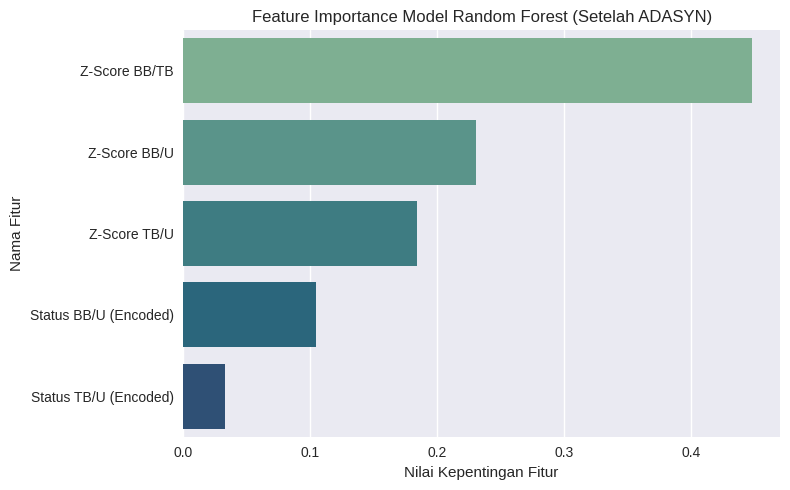

In [149]:
# === Visualisasi Hasil Feature Importance ===
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_importances, y=sorted_features, palette='crest')
plt.title("Feature Importance Model Random Forest (Setelah ADASYN)")
plt.xlabel("Nilai Kepentingan Fitur")
plt.ylabel("Nama Fitur")
plt.tight_layout()
plt.show()

In [150]:
# === Tabel Nilai Feature Importance ===
fi_df = pd.DataFrame({
    'Fitur': sorted_features,
    'Importance': sorted_importances
})

print("=== FEATURE IMPORTANCE (Model ADASYN) ===")
print(fi_df)

=== FEATURE IMPORTANCE (Model ADASYN) ===
                   Fitur  Importance
0          Z-Score BB/TB    0.447941
1           Z-Score BB/U    0.230721
2           Z-Score TB/U    0.184001
3  Status BB/U (Encoded)    0.104511
4  Status TB/U (Encoded)    0.032826


# **11. PERBANDINGAN DATA ASLI VS ENCODED**

In [151]:
print("=== INFORMASI DATA ASLI ===")
print(f"Dimensi data asli: {df.shape}")
print(f"Jumlah kolom: {len(df.columns)}")
print("Nama kolom asli:")
print(df.columns.tolist())
print("\n")

=== INFORMASI DATA ASLI ===
Dimensi data asli: (1617, 22)
Jumlah kolom: 22
Nama kolom asli:
['No', 'Nama Anak', 'Tanggal Lahir', 'Umur', 'Jenis Kelamin', 'Berat Badan Lahir (Kg)', 'Nama Ibu', 'Desa', 'Dusun', 'Alamat', 'RT', 'RW', 'Tanggal Pengukuran', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB', 'Status BB/U', 'Status TB/U', 'Status BB/TB', 'Cara Ukur']




In [152]:
print("=== INFORMASI DATA SETELAH ENCODING & FEATURE ENGINEERING ===")
print(f"Dimensi data hasil encoding: {df_processed.shape}")
print(f"Jumlah kolom: {len(df_processed.columns)}")
print("Nama kolom hasil encoding:")
print(df_processed.columns.tolist())
print("\n")

=== INFORMASI DATA SETELAH ENCODING & FEATURE ENGINEERING ===
Dimensi data hasil encoding: (1617, 32)
Jumlah kolom: 32
Nama kolom hasil encoding:
['No', 'Nama Anak', 'Tanggal Lahir', 'Umur', 'Jenis Kelamin', 'Berat Badan Lahir (Kg)', 'Nama Ibu', 'Desa', 'Alamat', 'RT', 'RW', 'Tanggal Pengukuran', 'BB', 'TB', 'Z-Score BB/U', 'Z-Score TB/U', 'Z-Score BB/TB', 'Status BB/U', 'Status TB/U', 'Status BB/TB', 'Cara Ukur', 'Posyandu_Larasati 1', 'Posyandu_Larasati 2', 'Posyandu_Larasati 3', 'Posyandu_Larasati 4', 'Posyandu_Larasati 5', 'Dusun_MLESE', 'Dusun_NGARAN', 'Dusun_SRAGON', 'Status BB/U (Encoded)', 'Status TB/U (Encoded)', 'Status BB/TB (Encoded)']




In [153]:
# Buat tabel ringkasan perbandingan
comparison_df = pd.DataFrame({
    'Aspek': ['Jumlah Baris', 'Jumlah Kolom', 'Contoh Kolom Asli', 'Contoh Kolom Setelah Encoding'],
    'Data Asli': [df.shape[0], df.shape[1], ', '.join(df.columns[:5]), ', '.join(df_processed.columns[:5])],
    'Data Setelah Encoding': [df_processed.shape[0], df_processed.shape[1], '-', '-']
})

print("=== PERBANDINGAN SINGKAT ===")
print(comparison_df)

=== PERBANDINGAN SINGKAT ===
                           Aspek  \
0                   Jumlah Baris   
1                   Jumlah Kolom   
2              Contoh Kolom Asli   
3  Contoh Kolom Setelah Encoding   

                                           Data Asli Data Setelah Encoding  
0                                               1617                  1617  
1                                                 22                    32  
2  No, Nama Anak, Tanggal Lahir, Umur, Jenis Kelamin                     -  
3  No, Nama Anak, Tanggal Lahir, Umur, Jenis Kelamin                     -  


#**12. PREDIKSI MANUAL**

In [154]:
# Tampilkan semua nama anak yang ada di dataset
print("=== DAFTAR ANAK DALAM DATASET ===")
print(df['Nama Anak'].unique())

=== DAFTAR ANAK DALAM DATASET ===
['KANISA GENDHIS AMELIA' 'GHANIA FRADELLA LEENA ' 'RAYYAN ALFARIZI PUTRA '
 'FAUZAN ADHIMA ' 'REXZA ACELIN ATHA A' 'NAJWA ALMEERA MADHURI'
 'AZKA NANDANA ' 'FIONA YASMINA SAUQIYA' 'AZKA FATHIR YULIANTO'
 'ALFAREZEL NENDR P' 'AZKIA QAILA PUTRI ' 'RASYID YAFI AKHDAN '
 'ZAID SABILA MUBAROK' 'DILAN GIRALLDA' 'MALAIKA ARSYILA SAPUTRI'
 'ALCEO REYNAND CHRISTIAWAN' 'LUNAR APRILIA PUTRI'
 'ADHA FARIZQI PILAR MAHARDIKA' 'RAFASYA FATA FAREZI RAIZ '
 'VANIA AQILA PUTRI ' 'ARSYILA ROMEESA FARZANA ' 'KYARA ESHA VALENI'
 'ANINDYA KHOIRUNISSA' 'FATHAN DANEL SAPUTRA' 'FARENDRA ARSYA ALFARO'
 'ANINDIRA NIDA UL KARIMAH' 'NELISA PUTRI NAFIA'
 'KAMAYEL GHAZZAL IRTAZA S' 'HELYA ARANIA SURYA '
 'CALLYSTA ZALFA AZZAHRA ' 'AZZAM FATHI HANNAN EL BARA '
 'RAYYAN BAGASKORO SAPUTRA ' 'RAFAEL SARWANA PUTRA '
 'GANENDRA PUTRA MAHARDIKA ' 'FAEYZA HANAN MARTINO ' 'NEELAM DWI SAFIRA '
 'RAISA AMARA PUTRI ' 'SHELLY TRI VANIASARI ' 'MUHAMMAD IHSAN WIBOWO'
 'AYRA NEIRISSA AUDIA INARA ' 

In [155]:
# Pastikan kolom tanggal diubah ke format datetime
df['Tanggal Pengukuran'] = pd.to_datetime(df['Tanggal Pengukuran'], errors='coerce')

In [156]:
# Ambil nama anak yang ingin dianalisis
nama_anak = 'ABIDZAR DEWANTARA'

# Filter data anak tersebut
data_anak = df[df['Nama Anak'] == nama_anak].copy()

In [157]:
# Tambahkan kolom Tahun dan Bulan
data_anak['Tahun'] = data_anak['Tanggal Pengukuran'].dt.year
data_anak['Bulan'] = data_anak['Tanggal Pengukuran'].dt.month

# Pilih tahun tertentu, misalnya 2024
tahun_pilih = 2024
data_tahun = data_anak[data_anak['Tahun'] == tahun_pilih]

# Ambil pengukuran terakhir per bulan
data_tahun = (
    data_tahun.sort_values('Tanggal Pengukuran')
    .groupby('Bulan', as_index=False)
    .last()
)

# Urutkan berdasarkan bulan
data_tahun = data_tahun.sort_values('Bulan')

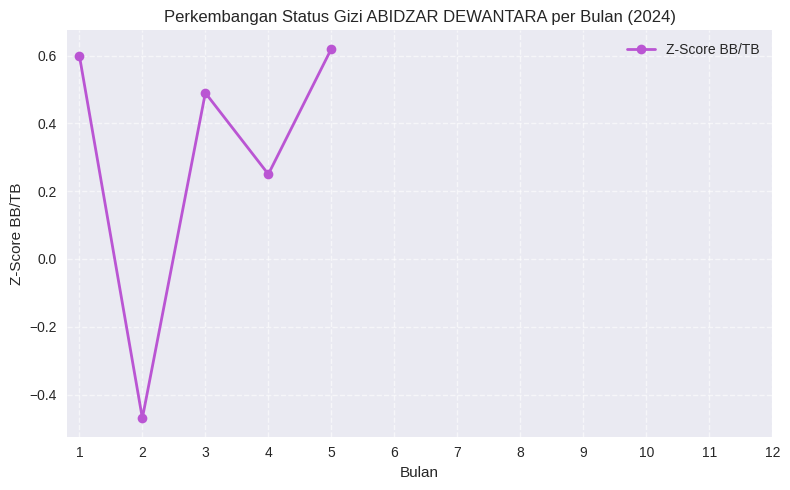

In [158]:
# Plot grafik
plt.figure(figsize=(8,5))
plt.plot(
    data_tahun['Bulan'],
    data_tahun['Z-Score BB/TB'],
    marker='o',
    color='mediumorchid',
    linewidth=2,
    label='Z-Score BB/TB'
)
plt.title(f"Perkembangan Status Gizi {nama_anak} per Bulan ({tahun_pilih})")
plt.xlabel("Bulan")
plt.ylabel("Z-Score BB/TB")
plt.xticks(range(1,13))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

#**MENYIMPAN MODEL**